# YXG-32H Magnet Parameters

| 항목 | 값 |
|------|------|
| **Material** | Sm₂Co₁₇ (Sm2Co17 / Sm2(CoFeCuZr)17) |
| **Grade** | **YXG-32** |
| **Remanence Br** | **1.10 – 1.13 T** (11.0 – 11.3 kGs) |
| **Coercivity Force Hcb** | **812 – 860 kA/m** (10.2 – 10.8 kOe) |
| **Intrinsic Coercivity Hcj** | **≥1990 kA/m** (≥25 kOe) |
| **Maximum Energy Product (BH)max** | **230 – 255 kJ/m³** (29 – 32 MGOe) |
| **Max Working Temperature** | **350 °C** |


# YXG-32 Magnet Parameters

| 항목 | 값 |
|------|------|
| **Grade** | **YXG-32** |
| **Remanence Br** | **1.10–1.13 T** (11.0–11.3 kGs) |
| **Coercivity Force Hcb** | **812–860 kA/m** |
| **Coercivity Force Hcb (kOe)** | **10.2–10.8 kOe** |
| **Intrinsic Coercivity Hcj** | **≥1433 kA/m** |
| **Intrinsic Coercivity Hcj (kOe)** | **≥18 kOe** |
| **Maximum Energy Product (BH)max** | **230–255 kJ/m³** (30–33 MGOe) |
| **Max Working Temperature** | **300 °C** |


# Magnetization Calculation

$$
M \approx B_r/\mu_0, Remanence \approx 1.10 \sim 1.13 T 
$$ 

Magnetization M ≈ 8.87e+05 A/m


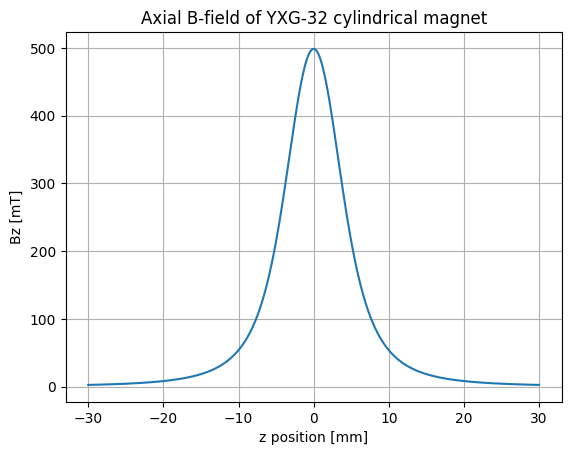

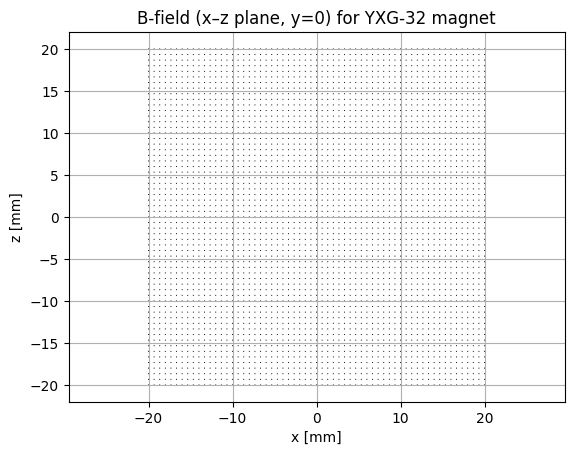

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import magpylib as magpy
from magpylib.magnet import Cylinder

# ==========================
# 0. YXG-32 재료 파라미터
# ==========================
Br_min, Br_max = 1.10, 1.13        # [T]
Br = 0.5 * (Br_min + Br_max)       # 중간값 1.115 T

mu0 = 4 * np.pi * 1e-7             # [H/m]
M = Br / mu0                       # [A/m] ≈ 8.9e5 A/m

print(f"Magnetization M ≈ {M:.2e} A/m")

# ==========================
# 1. 원통형 자석 정의
#    (사이즈는 예시값, 꼭 수정해서 사용)
# ==========================
D = 0.010   # 직경 10 mm
H = 0.005   # 높이 5 mm

mag = Cylinder(
    dimension=(D, H),              # (diameter, height) in meters
    magnetization=(0, 0, M),       # z축 방향 자화 (YXG-32)
    position=(0, 0, 0),            # 중심 원점
)

# ==========================
# 2. 축 방향(z-axis) 자기장 프로파일
# ==========================
z = np.linspace(-0.03, 0.03, 400)   # -30~+30 mm 범위
pos_axis = np.column_stack([
    np.zeros_like(z),
    np.zeros_like(z),
    z,
])

B_axis = magpy.getB(mag, pos_axis)  # [T], shape (N, 3)
Bz_axis = B_axis[:, 2]

plt.figure()
plt.plot(z*1e3, Bz_axis*1e3)
plt.xlabel('z position [mm]')
plt.ylabel('Bz [mT]')
plt.title('Axial B-field of YXG-32 cylindrical magnet')
plt.grid(True)

# ==========================
# 3. x–z 평면 2D 자기장 맵 (y=0)
# ==========================
xs = np.linspace(-0.02, 0.02, 61)   # -20~+20 mm
zs = np.linspace(-0.02, 0.02, 61)

X, Z = np.meshgrid(xs, zs)
pos_plane = np.column_stack([
    X.ravel(),
    np.zeros_like(X).ravel(),       # y=0 평면
    Z.ravel(),
])

B_plane = magpy.getB(mag, pos_plane)
Bx = B_plane[:, 0].reshape(X.shape)
Bz = B_plane[:, 2].reshape(X.shape)

plt.figure()
plt.quiver(X*1e3, Z*1e3, Bx, Bz, pivot='mid', scale=5e5)
plt.xlabel('x [mm]')
plt.ylabel('z [mm]')
plt.title('B-field (x–z plane, y=0) for YXG-32 magnet')
plt.axis('equal')
plt.grid(True)

plt.show()
